# kNN - Experimento variando K y tamaño de imagenes


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

## Explorando los datos

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_orig = pd.read_csv("../data/train.csv")
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [2]:
df_orig.sample(frac=1, random_state=2020)

def slice(n):
    df_train = df_orig.copy()[:n]
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y


In [3]:
class KNNnPCAClassifier:
    def __init__(self, k, alpha):
        self.knn_classifier = metnum.KNNClassifier(k, "uniform")
        self.pca = metnum.PCA(alpha)

    def fit(self, X_train, y_train):
        self.pca.fit(X_train)
        self.knn_classifier.fit(self.pca.transform(X_train), y_train)
    
    def predict(self, X):
        return self.knn_classifier.predict(self.pca.transform(X))

### Experimento

In [4]:
import metnum
import pandas as pd

from scoring import metrics
from scoring import cross_validation as cv
from tqdm import tqdm

scoring_fns = {
    "accuracy":  metrics.accuracy_score,
    "recall":    metrics.recall_score,
    "precision": metrics.precision_score,
    "f1":        metrics.f1_score,
}

K_FOLD_VALUES = [2, 4, 8, 10, 12, 16, 20, 40]
X_SIZES = [500, 1000, 2500, 5000, 8000, 10000, 25000, 42000]
#LABEL = "kNN_distance_pow"
LABEL = "kNN_uniform+PCA"
#LABEL = "kNN_distance_pow+PCA"

rows = []
clf = KNNnPCAClassifier(5, 34)
for K in tqdm(K_FOLD_VALUES, "Ks"):
    for size in X_SIZES:
        X, y = slice(size)
        scores = cv.cross_validate_fns(clf, X, y, scoring_fns, K)

        # scores es un dict con las keys de scoring_fns, que son las
        # mismas que las columnas del dataframe.
        rows.append({
            **{
                "label": LABEL,
                "K": K,
                "sample_size": size,
            }, 
            **scores
        })

print("Creating DataFrame...")
df = pd.DataFrame(rows, columns=["label", "K", "sample_size", "accuracy", "recall", "precision", "f1"])

print("Finished!")

Ks: 100%|██████████| 8/8 [55:57<00:00, 419.63s/it]


Creating DataFrame...
Finished!


In [7]:
df.sort_values("accuracy", ascending=False)

,label,K,sample_size,accuracy,recall,precision,f1
63,kNN_uniform+PCA,40,42000,0.975048,0.974775,0.975081,0.974787
55,kNN_uniform+PCA,20,42000,0.974905,0.974600,0.974942,0.974683
47,kNN_uniform+PCA,16,42000,0.974667,0.974432,0.974714,0.974502
31,kNN_uniform+PCA,10,42000,0.974167,0.973879,0.974201,0.973984
39,kNN_uniform+PCA,12,42000,0.974119,0.973809,0.974164,0.973910
23,kNN_uniform+PCA,8,42000,0.973810,0.973614,0.973806,0.973654
15,kNN_uniform+PCA,4,42000,0.973167,0.972899,0.973117,0.972968
62,kNN_uniform+PCA,40,25000,0.971640,0.971392,0.971428,0.971176
54,kNN_uniform+PCA,20,25000,0.971040,0.970847,0.970987,0.970794
46,kNN_uniform+PCA,16,25000,0.971031,0.970639,0.970889,0.970669


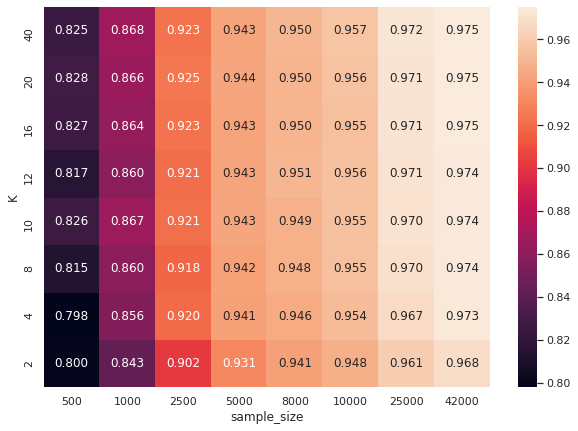

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

df_pivot = df.pivot("K", "sample_size", "accuracy")
ax = sns.heatmap(data=df_pivot, annot=True, fmt=".3f")
ax.invert_yaxis()


In [8]:
df.to_csv("data/pca/variaciones/knn_pca_uniform.csv", index=False)

In [ ]:
import seaborn as sns
df_pivot = df.pivot("K", "sample_size", "accuracy")
ax = sns.heatmap(data=df_pivot, annot=True, fmt=".2f")
ax.invert_yaxis()

In [ ]:
## concluimos que distance_pow es el mejor
## TODO: graficar cosas